In [201]:
from sklearn.metrics.cluster import *
import numpy as np
from sklearn.datasets import *
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sys
import pylab
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [202]:
def nmi(x, y):
    mi = mutual_info_score(x, y)
    nmi = mi/entropy(y)
    return nmi

In [203]:
def PCA_fit(X, num_components):
    X_mean = np.mean(X,axis=0)
    X_std = np.std(X,axis=0)
    scaler = preprocessing.StandardScaler().fit(X)
    X = scaler.transform(X)
    U, s, V = np.linalg.svd(X)
    V = V[:,:num_components]
    exp_var = (s ** 2) / X.shape[0] 
    exp_var = s[:num_components]
    return V, exp_var, X_mean, X_std
    

In [204]:
def PCA_transform(X, center, scale, G):
    X = X - center
    PC = np.dot(X, G)
    X = X/scale
    return PC
    

(1797, 8, 8)
(1797, 64)


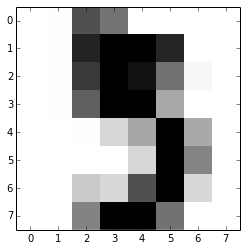

In [205]:
random_state = 123
digits = load_digits()
print digits.images.shape
remake = digits.images.reshape(1797,64)
print remake.shape
plt.imshow(digits.images[5], interpolation='none', cmap=plt.cm.Greys)
X_train, X_test, y_train, y_test = train_test_split(remake, digits.target, test_size=0.4, train_size=0.6, random_state=random_state)

In [206]:
print len(X_train)
print len(y_train)
print len(X_test)
print len(y_test)

1078
1078
719
719


In [207]:
lr = LogisticRegression(C = 1000000000, penalty='l2',random_state= random_state)
lr.fit(X_train, y_train)
baseline = lr.score(X_test, y_test)
print "Baseline: " + str(baseline)

Baseline: 0.937413073713


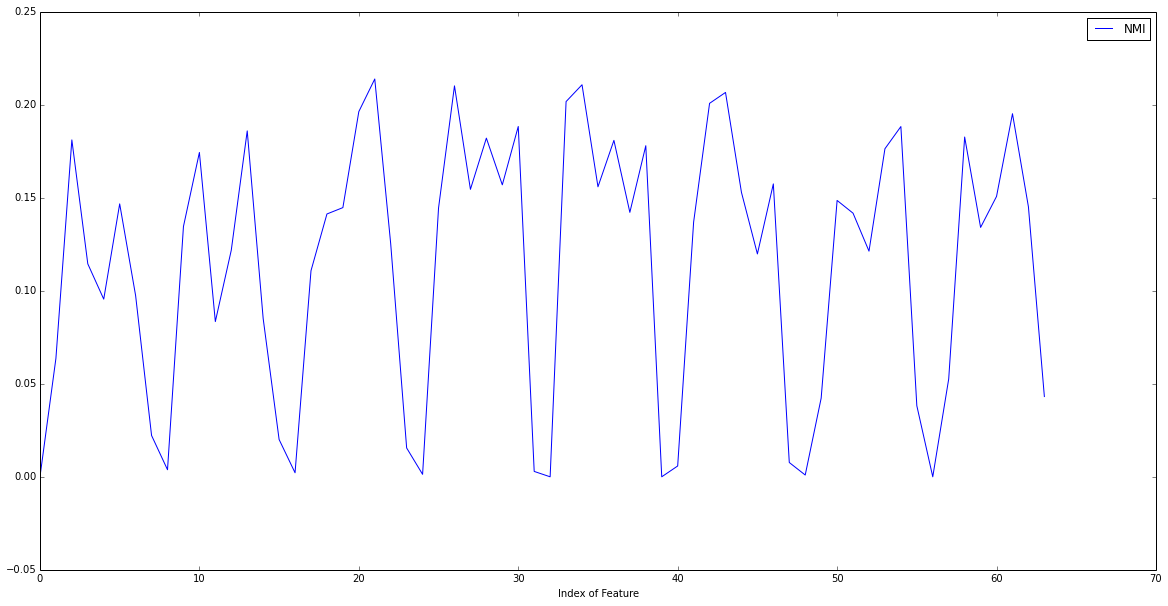

In [208]:
nmis = list()
for i in range(X_train.shape[1]):
    nmis.append(nmi(X_train[:,i],y_train))
l = plt.figure(figsize=(20, 10))
pylab.plot(range(0,64),nmis, c = '#0000FF', label = 'NMI')
pylab.xlabel('Index of Feature')
pylab.legend(loc='best')

In [209]:
accuracies = list()
indeces = list()
for i in np.arange(0,max(nmis),0.02):
    for j in range(X_train.shape[1]):
        value = nmi(X_train[:,j],y_train)
        if value < 0:
            value = 0
        if(i > value):
            indeces.append(j)
    X_train_temp = np.delete(X_train,indeces, 1)
    X_test_temp = np.delete(X_test,indeces, 1)
    lr.fit(X_train_temp,y_train)
    res = lr.score(X_test_temp, y_test)
    print res, X_test_temp.shape[1], baseline
    accuracies.append(res)
    indeces = list()

0.937413073713 64 0.937413073713
0.937413073713 52 0.937413073713
0.938803894298 49 0.937413073713
0.940194714882 46 0.937413073713
0.944367176634 45 0.937413073713
0.934631432545 41 0.937413073713
0.941585535466 38 0.937413073713
0.92628650904 32 0.937413073713
0.894297635605 18 0.937413073713
0.884561891516 15 0.937413073713
0.705146036161 6 0.937413073713


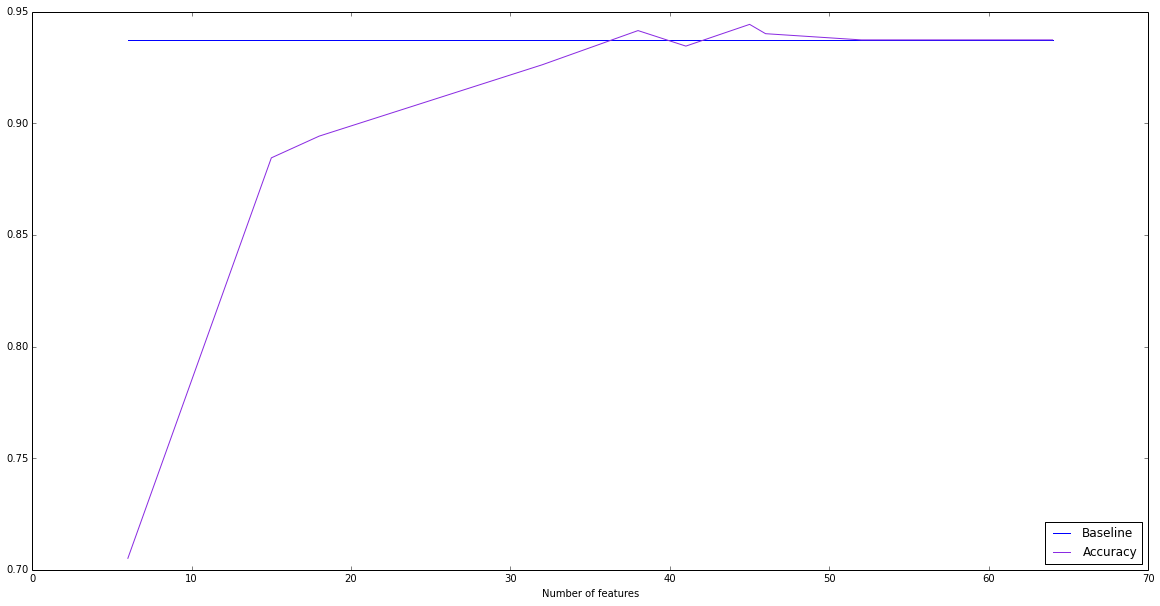

In [210]:
baselines = list()
for i in accuracies:
  baselines.append(baseline)  
l = plt.figure(figsize=(20, 10))
pylab.plot(baselines,xdata= (6,15,18,32,38,41,45,46,49,52,64), c = '#0000FF', label = 'Baseline')
pylab.plot(accuracies[::-1],xdata= (6,15,18,32,38,41,45,46,49,52,64), c='#8A2BE2', label='Accuracy' )
pylab.xlabel('Number of features')
pylab.legend(loc='best')

In [211]:
lr = LogisticRegression(C = 0.2, penalty='l1', random_state= random_state)
lr.fit(X_train, y_train)
score_l1 = lr.score(X_test, y_test)
print "Accuracy: " + str(score_l1) + ", Baseline: " + str(baseline)

Accuracy: 0.968011126565, Baseline: 0.937413073713


In [212]:
number_of_features = 0
c = 0
for raw in lr.coef_:
    c+=1
    for cf in raw:
        if cf != 0:
            number_of_features+=1
    print "For disctiminant function №" + str(c) + " There are " + str(number_of_features) + " Selected feature."
    number_of_features = 0

For disctiminant function №1 There are 16 Selected feature.
For disctiminant function №2 There are 35 Selected feature.
For disctiminant function №3 There are 26 Selected feature.
For disctiminant function №4 There are 28 Selected feature.
For disctiminant function №5 There are 22 Selected feature.
For disctiminant function №6 There are 23 Selected feature.
For disctiminant function №7 There are 23 Selected feature.
For disctiminant function №8 There are 27 Selected feature.
For disctiminant function №9 There are 39 Selected feature.
For disctiminant function №10 There are 38 Selected feature.


In [213]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print "Accuracy: " + str(rf.score(X_test, y_test)) + ", Baseline " + str(baseline)

Accuracy: 0.92628650904, Baseline 0.937413073713


In [214]:
print len(rf.feature_importances_)
print len(nmis)

64
64


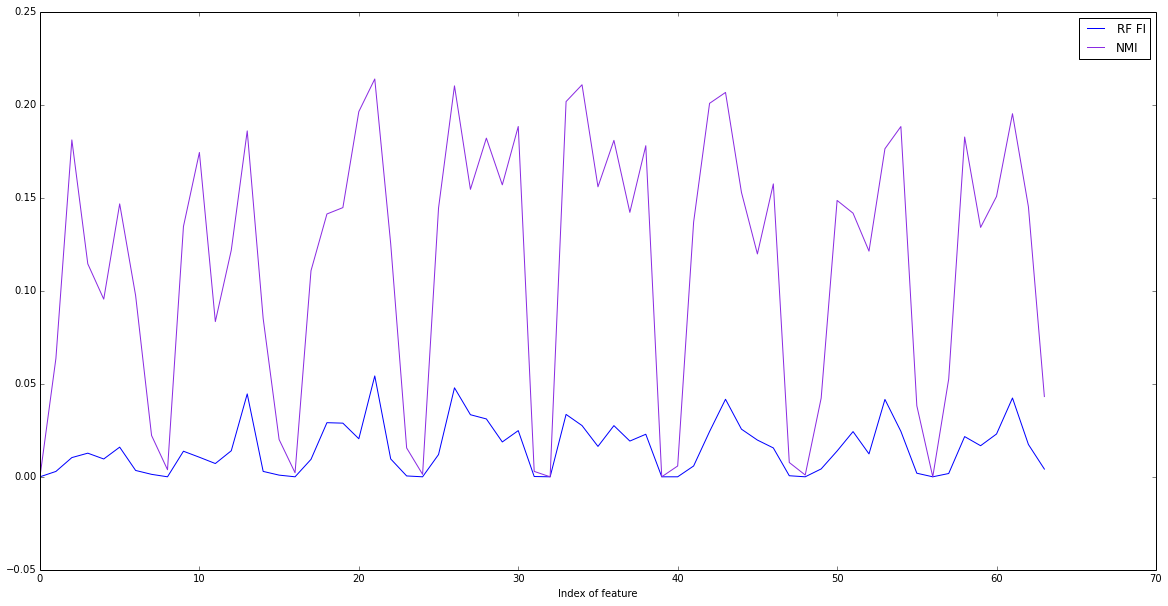

In [215]:
l = plt.figure(figsize=(20, 10))
pylab.plot(rf.feature_importances_, c = '#0000FF', label = 'RF FI')
pylab.plot(nmis, c='#8A2BE2', label='NMI' )
pylab.xlabel('Index of feature')
pylab.legend(loc='best')

# From the graph it is obvious, that Feature Importances for RF and NMI are correlated

In [216]:
G, exp_var, X_mean, X_std = PCA_fit(X_train,60)

In [217]:
exp_var_ratio = (exp_var /exp_var.sum()) 


60


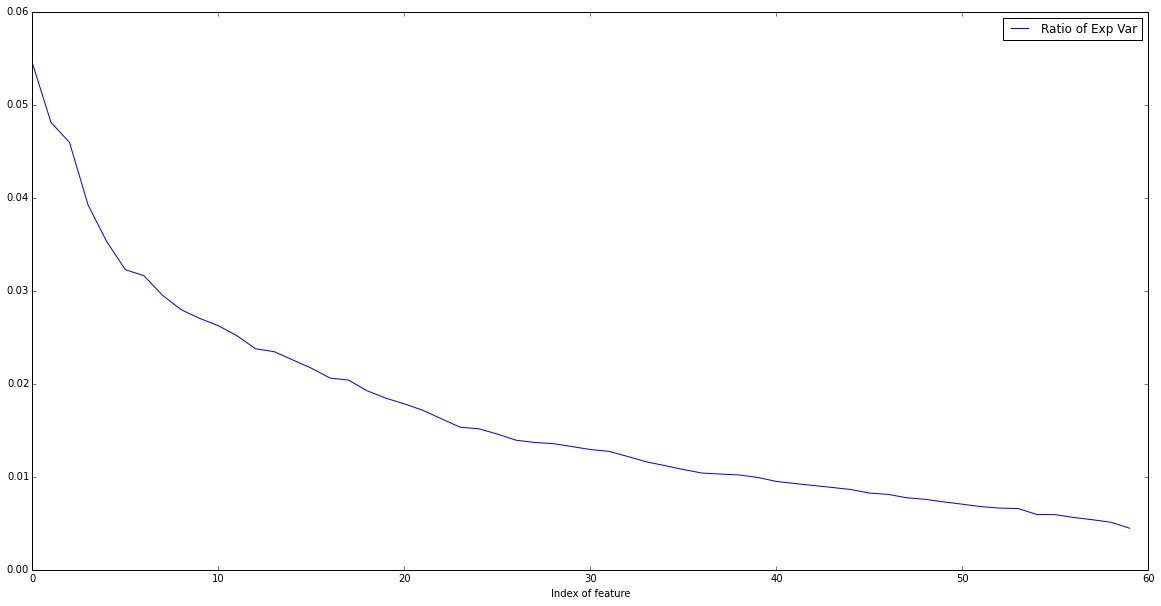

In [218]:
print len(exp_var_ratio)
l = plt.figure(figsize=(20, 10))
pylab.plot(exp_var_ratio, c = '#0000FF', label = 'Ratio of Exp Var')
pylab.xlabel('Index of feature')
pylab.legend(loc='best')

In [219]:
PC = PCA_transform(X_test,X_mean, X_std,G)


/Library/Python/2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/Library/Python/2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


In [220]:
number_of_components = 60
while True:
    G, exp_var, X_mean, X_std = PCA_fit(X_train,number_of_components)
    PC_train = PCA_transform(X_train,X_mean, X_std,G)
    PC_test = PCA_transform(X_test,X_mean, X_std,G)

    lr = LogisticRegression(C = 1000000000, penalty='l2', random_state= random_state)
    lr.fit(PC_train, y_train)
    res = lr.score(PC_test, y_test)
    print res
    if(res > baseline):
        print "Greater than baseline. Number of components: " +  str(number_of_components)
    else:
        print "Less than baseline. Number of components: " +  str(number_of_components)
        break
    number_of_components -=1
number_of_components+=1
print str(number_of_components) + " is enough"

0.945757997218
Greater than baseline. Number of components: 60
0.951321279555
Greater than baseline. Number of components: 59
0.947148817803
Greater than baseline. Number of components: 58
0.948539638387
Greater than baseline. Number of components: 57
0.949930458971
Greater than baseline. Number of components: 56
0.945757997218
Greater than baseline. Number of components: 55
0.947148817803
Greater than baseline. Number of components: 54
0.94297635605
Greater than baseline. Number of components: 53
0.941585535466
Greater than baseline. Number of components: 52
0.940194714882
Greater than baseline. Number of components: 51
0.944367176634
Greater than baseline. Number of components: 50
0.947148817803
Greater than baseline. Number of components: 49
0.948539638387
Greater than baseline. Number of components: 48
0.940194714882
Greater than baseline. Number of components: 47
0.937413073713
Less than baseline. Number of components: 46
47 is enough


/Library/Python/2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide
/Library/Python/2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
